<a href="https://colab.research.google.com/github/kabeerbora/ECON5625/blob/main/RDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

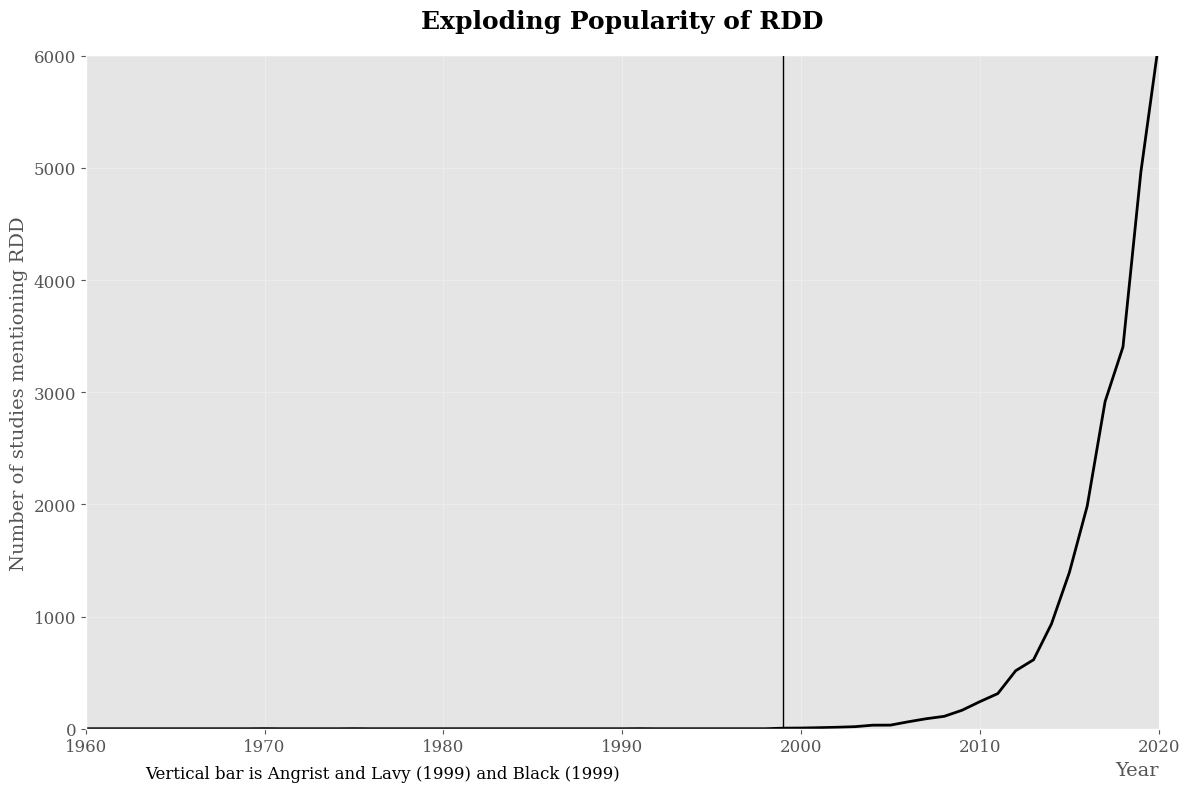

Total studies by 2020: 6118
Studies before 1999: 3
Studies after 1999: 23944


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

years = np.arange(1960, 2021)
rdd_mentions = np.zeros(len(years))

for i, year in enumerate(years):
    if year < 1999:
        rdd_mentions[i] = np.random.poisson(0.1)
    elif year == 1999:
        rdd_mentions[i] = 5
    else:
        years_since_1999 = year - 1999
        base_growth = 5 * np.exp(0.35 * years_since_1999)
        rdd_mentions[i] = base_growth + np.random.normal(0, base_growth * 0.1)

rdd_mentions = np.maximum(rdd_mentions, 0)

plt.figure(figsize=(12, 8))
plt.plot(years, rdd_mentions, 'k-', linewidth=2)
plt.axvline(x=1999, color='black', linestyle='-', linewidth=1)
plt.xlim(1960, 2020)
plt.ylim(0, 6000)

plt.xlabel('Year', fontsize=14, loc='right')

plt.ylabel('Number of studies mentioning RDD', fontsize=14)
plt.title('Exploding Popularity of RDD', fontsize=18, fontweight='bold', pad=20)

plt.figtext(0.125, 0.02, 'Vertical bar is Angrist and Lavy (1999) and Black (1999)',
           fontsize=12, ha='left')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print(f"Total studies by 2020: {int(rdd_mentions[-1])}")
print(f"Studies before 1999: {int(np.sum(rdd_mentions[years < 1999]))}")
print(f"Studies after 1999: {int(np.sum(rdd_mentions[years >= 1999]))}")

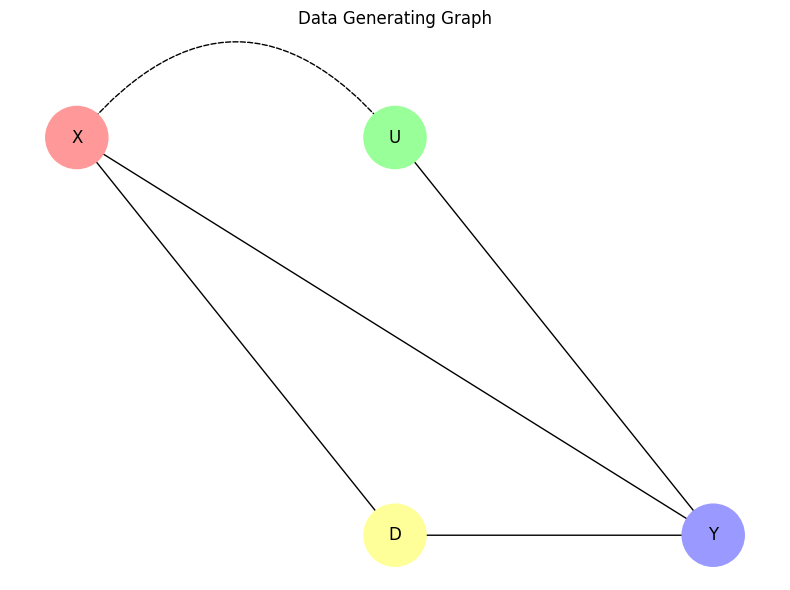

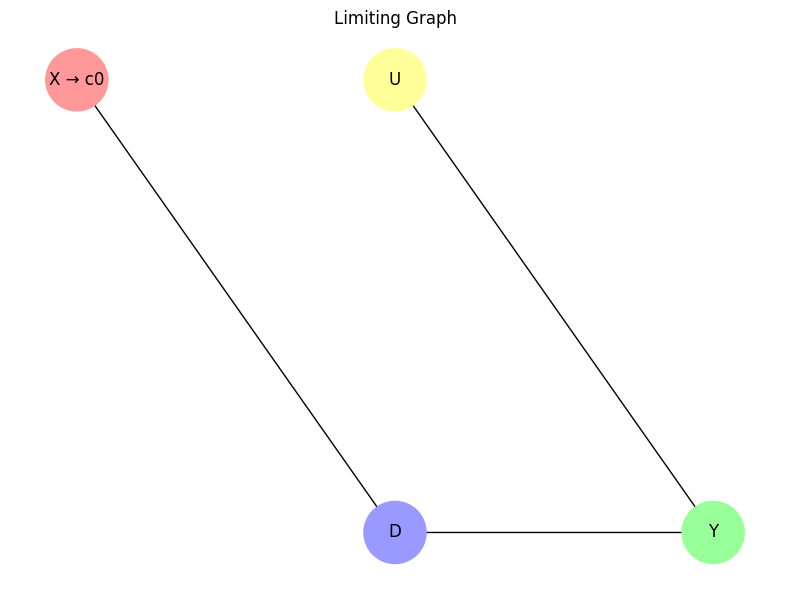

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create DAG A (Data generating graph)
G1 = nx.DiGraph()
G1.add_edges_from([('X', 'U'), ('U', 'Y'), ('X', 'D'), ('X', 'Y'), ('D', 'Y')])
pos1 = {'X': (0, 1), 'U': (1, 1), 'D': (1, 0), 'Y': (2, 0)}
colors1 = ['#FF9999', '#99FF99', '#9999FF', '#FFFF99']  # Red, Green, Blue, Yellow

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G1, pos1, node_color=colors1, node_size=2000)

# Create custom labels with X → c0
labels1 = {'X': 'X', 'U': 'U', 'D': 'D', 'Y': 'Y'}
nx.draw_networkx_labels(G1, pos1, labels=labels1, font_size=12)

# Draw edges with arrowheads
nx.draw_networkx_edges(G1, pos1, edgelist=[('U', 'Y'), ('X', 'D'), ('X', 'Y'), ('D', 'Y')],
                       arrows=True, arrowstyle='-|>', arrowsize=20)
nx.draw_networkx_edges(G1, pos1, edgelist=[('X', 'U')], connectionstyle='arc3,rad=-0.6',
                       style='dashed', arrows=True, arrowstyle='-|>', arrowsize=20)

plt.title('Data Generating Graph')
plt.axis('off')
plt.tight_layout()
plt.show()

# Create DAG B (Limiting graph)
G2 = nx.DiGraph()
G2.add_edges_from([('X', 'D'), ('D', 'Y'), ('U', 'Y')])
pos2 = {'X': (0, 1), 'D': (1, 0), 'U': (1, 1), 'Y': (2, 0)}
colors2 = ['#FF9999', '#9999FF', '#99FF99', '#FFFF99']  # Red, Blue, Green, Yellow

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G2, pos2, node_color=colors2, node_size=2000)

# Create custom labels with X → c0
labels2 = {'X': 'X → c0', 'U': 'U', 'D': 'D', 'Y': 'Y'}
nx.draw_networkx_labels(G2, pos2, labels=labels2, font_size=12)

# Draw edges with arrowheads
nx.draw_networkx_edges(G2, pos2, edgelist=[('X', 'D'), ('D', 'Y'), ('U', 'Y')],
                       arrows=True, arrowstyle='-|>', arrowsize=20)

plt.title('Limiting Graph')
plt.axis('off')
plt.tight_layout()
plt.show()

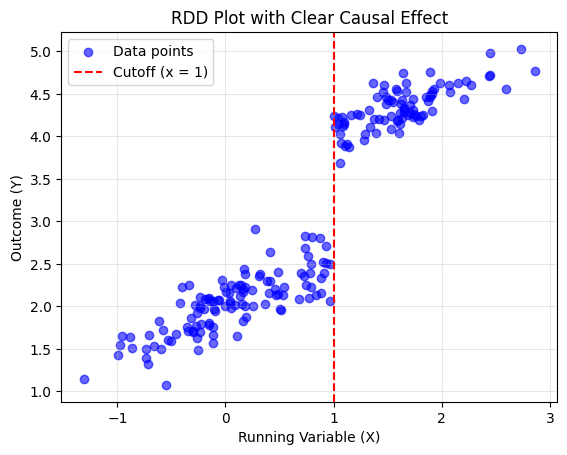

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data
np.random.seed(42)
n_points = 200
x = np.concatenate([np.random.normal(0, 0.5, n_points//2), np.random.normal(1.5, 0.5, n_points//2)])
y = 2 + 0.5 * x + np.random.normal(0, 0.2, n_points)
y[x >= 1] += 1.5  # Clear causal jump at cutoff = 1
cutoff = 1

# Create plot
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.axvline(x=cutoff, color='red', linestyle='--', label=f'Cutoff (x = {cutoff})')
plt.xlabel('Running Variable (X)')
plt.ylabel('Outcome (Y)')
plt.title('RDD Plot')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

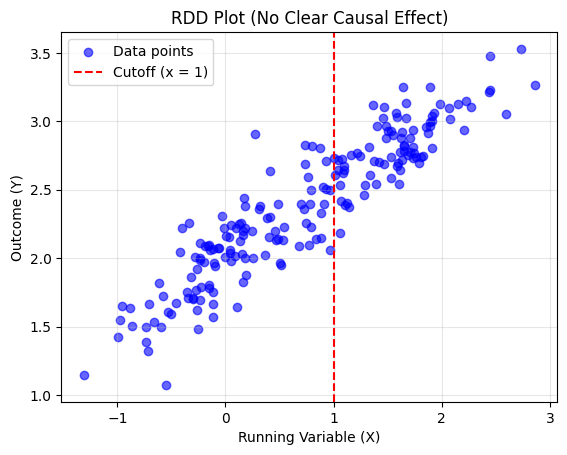

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
n_points = 200
x = np.concatenate([np.random.normal(0, 0.5, n_points//2), np.random.normal(1.5, 0.5, n_points//2)])
y = 2 + 0.5 * x + np.random.normal(0, 0.2, n_points)  # No jump at cutoff
cutoff = 1

# Create scatter plot
plt.scatter(x, y, alpha=0.6, color='blue', label='Data points')
plt.axvline(x=cutoff, color='red', linestyle='--', label=f'Cutoff (x = {cutoff})')
plt.xlabel('Running Variable (X)')
plt.ylabel('Outcome (Y)')
plt.title('RDD Plot (No Clear Causal Effect)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()